## K-Nearest Neighbor(KNN) Algorithm for Machine Learning

- It is  Supervised Learning algorithm
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
- KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data

Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.

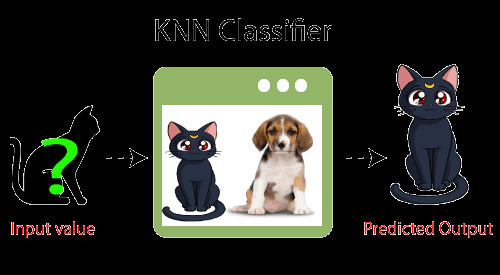

#### Why do we need a K-NN Algorithm?
- Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. 
- To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram:

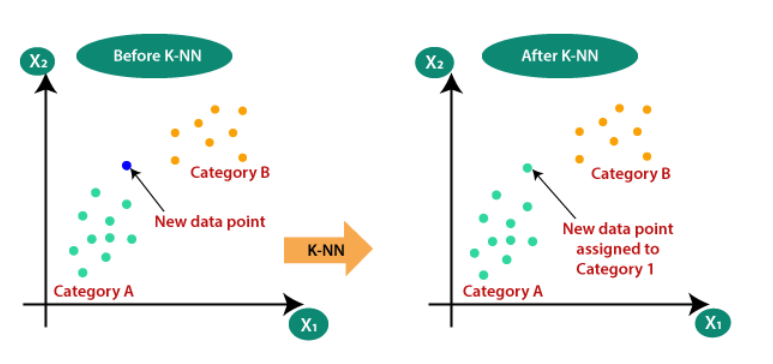

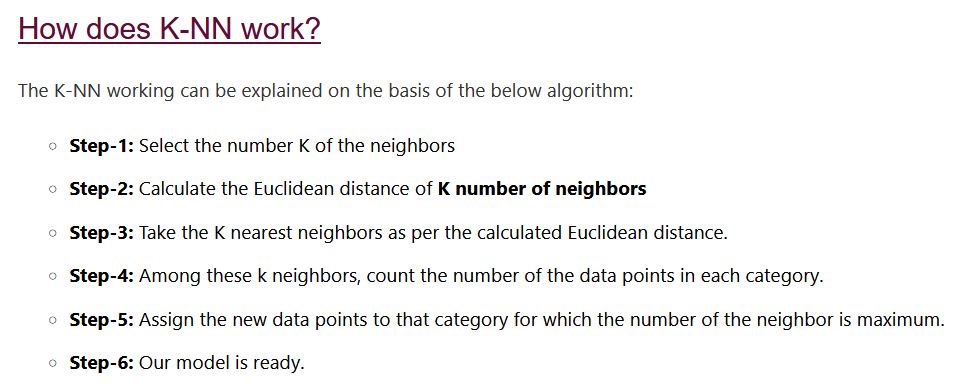

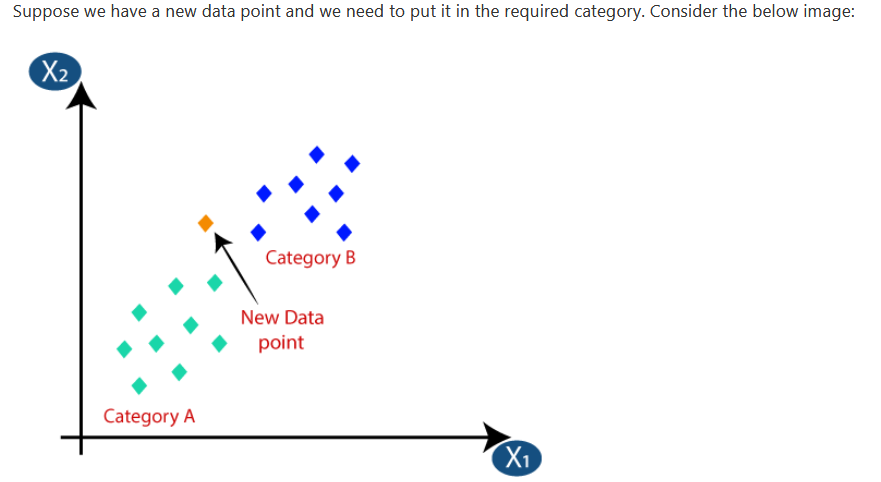

- Firstly, we will choose the number of neighbors, so we will choose the k=5.
- Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:


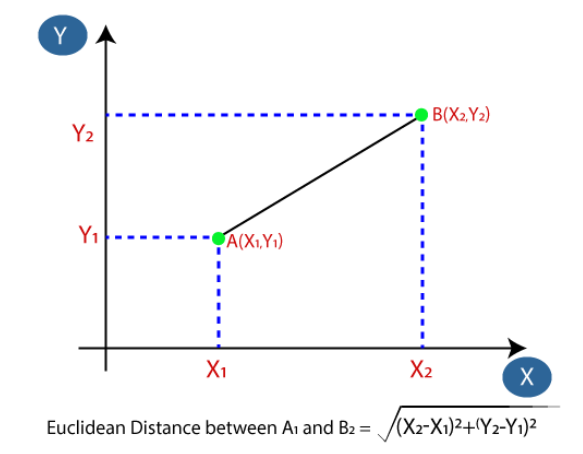

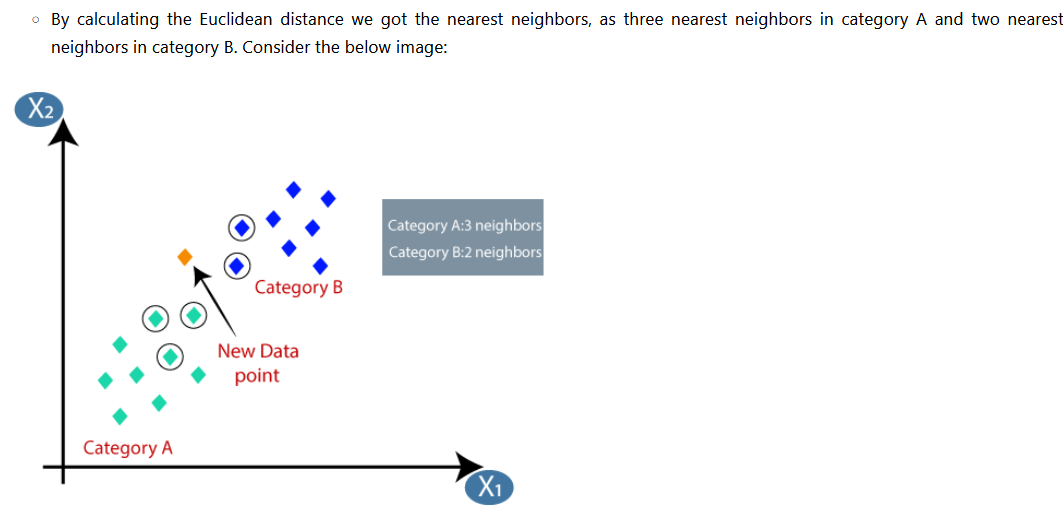

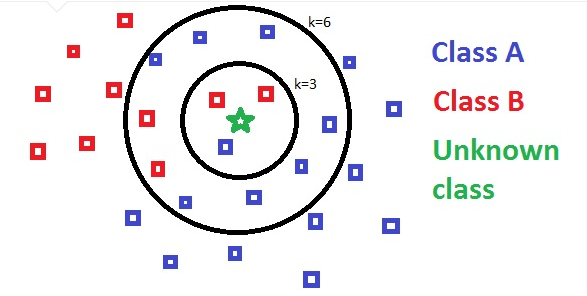

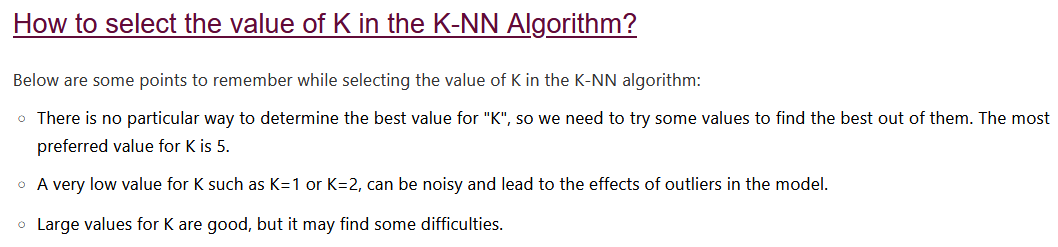

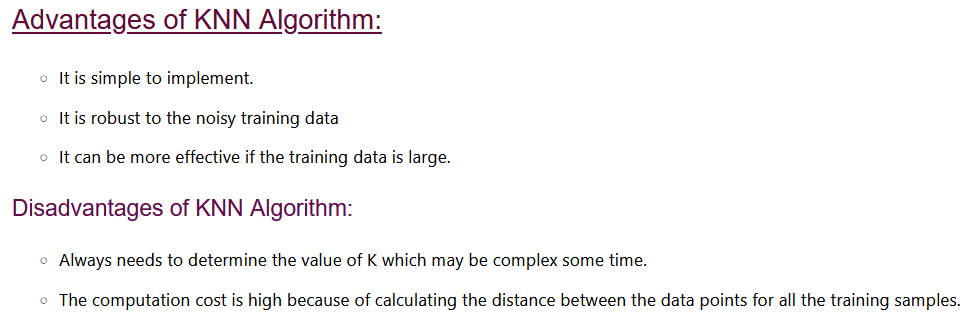

In [27]:
# Importing the libraries  
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [45]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [46]:
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

In [47]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
X_train

array([[6.5, 2.8, 4.6, 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 3.5, 1.4, 0.3],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 5.4, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 3. , 4.2, 1.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [4.6, 3.4, 1.4, 0.3],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 2.8, 4.5, 1.3],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 3

In [ ]:
# K-NN and Logistic Regression bith required StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train

array([[ 8.03473255e-01, -5.38815906e-01,  4.54452640e-01,
         3.79466037e-01],
       [ 1.04344393e+00, -1.25723711e+00,  1.13159715e+00,
         7.69376094e-01],
       [ 1.16342927e+00, -5.98684340e-02,  9.62311023e-01,
         1.15928615e+00],
       [-8.76321497e-01,  1.13750025e+00, -1.35126605e+00,
        -1.18017419e+00],
       [ 2.03546558e-01, -1.97565832e+00,  6.80167477e-01,
         3.79466037e-01],
       [ 5.63502576e-01, -2.99342170e-01,  1.01873973e+00,
         7.69376094e-01],
       [ 9.23458594e-01, -2.99342170e-01,  4.54452640e-01,
         1.19525999e-01],
       [ 2.24329733e+00, -1.01776338e+00,  1.75231295e+00,
         1.41922619e+00],
       [-1.56409460e-01,  1.85592145e+00, -1.18197993e+00,
        -1.18017419e+00],
       [-9.96306836e-01,  1.37697398e+00, -1.35126605e+00,
        -1.31014421e+00],
       [-1.23627752e+00, -5.98684340e-02, -1.35126605e+00,
        -1.18017419e+00],
       [-7.56336157e-01, -7.78289642e-01,  5.94516758e-02,
      

In [51]:
#train the model with the help of KNeighborsClassifier class of sklearn as follows −
from sklearn.neighbors import KNeighborsClassifier
KNclf = KNeighborsClassifier(n_neighbors = 3)
KNclf.fit(X_train, y_train) #training 


KNeighborsClassifier(n_neighbors=3)

In [52]:
#At last we need to make prediction. It can be done with the help of following script −

y_pred = KNclf.predict(X_test)


In [53]:
KNclf.score(X_test,y_test)

1.0

In [54]:
y_test#actual target 

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [55]:
y_pred#predicted target

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [56]:
#Next, print the results as follows −
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Accuracy: 1.0


### KNN as Regressor



In [64]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [91]:
# This notebook only selects a couple features for simplicity
# However, I encourage you to play with adding and substracting more features
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','sqft_basement',"zipcode"]

X = df.loc[:, features]

y = df.loc[:, 'price'].values

In [92]:
#Splitting Data into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 6)
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [95]:
y_pred=knnr.predict(X_test)

In [79]:
y_pred# predicted target 

array([ 346590.8, 1194600. ,  451045. , ...,  789250. ,  365385. ,
        582510. ])

In [80]:
y_test # actual target 

array([ 297000., 1578000.,  562100., ...,  774950.,  372500.,  599995.])

In [96]:
knnr.score(X_test,y_test)

0.6103042939426339

In [ ]:
# find the MSE as follows −

print ("The MSE is:",format(np.power(y-knnr.predict(X),2).mean()))
